<a href="https://colab.research.google.com/github/CyDevLabs/Underwater-Mine-Warfare-/blob/main/DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
2/2 [==============================] - 9s 2s/step - loss: 11860.9629
Epoch 2/20
2/2 [==============================] - 6s 2s/step - loss: 4600.6538
Epoch 3/20
2/2 [==============================] - 7s 2s/step - loss: 3316.9468
Epoch 4/20
2/2 [==============================] - 6s 2s/step - loss: 3314.4561
Epoch 5/20
2/2 [==============================] - 7s 2s/step - loss: 3060.0178
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 2943.9087
Epoch 7/20
2/2 [==============================] - 8s 2s/step - loss: 2850.3643
Epoch 8/20
2/2 [==============================] - 6s 3s/step - loss: 2808.3313
Epoch 9/20
2/2 [==============================] - 7s 2s/step - loss: 2770.3093
Epoch 10/20
2/2 [==============================] - 7s 3s/step - loss: 2700.4934
Epoch 11/20
2/2 [==============================] - 7s 2s/step - loss: 2668.0215

2/2 [==============================] - 1s 506ms/step


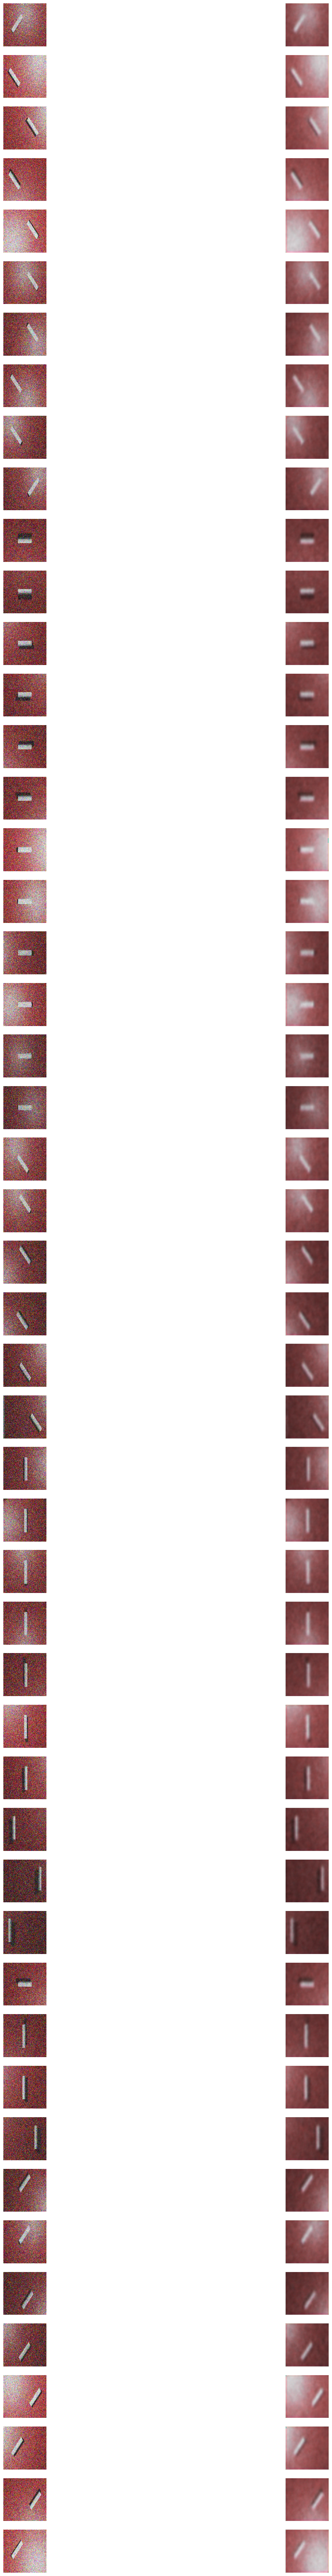

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the noisy images
noisy_images = []
for i in range(50):
    path = "/content/drive/MyDrive/Colab Notebooks/data/MinesGN/" + "noisy_" + str(i) + ".png"
    noisy_image = tf.keras.preprocessing.image.load_img(path)
    noisy_image = tf.keras.preprocessing.image.img_to_array(noisy_image)
    noisy_image = tf.image.resize(noisy_image, (126, 126))
    noisy_images.append(noisy_image)

noisy_images = np.array(noisy_images)

# Build the DAE model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(126, 126, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(3, (3,3), activation='relu', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the DAE
model.fit(noisy_images, noisy_images, epochs=20) 

denoised_images = model.predict(noisy_images)

fig, axs = plt.subplots(50, 2, figsize=(20, 100))

for i in range(50):
    axs[i, 0].imshow(noisy_images[i].astype(np.uint8))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(denoised_images[i].astype(np.uint8))
    axs[i, 1].axis('off')

plt.show()
